In [38]:
import pandas as pd

complete_data = pd.read_csv('data_preprocessed/data.csv')
data = complete_data.copy()

data.drop('status', inplace=True, axis=1)
data = data.values
target = complete_data['status'].values
print(data)
print(target)

[[     0   5314   1787 ...  96396     12   8033]
 [     1   5316   1801 ... 165960     36   4610]
 [     2   6863   9188 ... 127080     60   2118]
 ...
 [   325   6805   8972 ...  45024     48    938]
 [   326   7233  10963 ... 115812     36   3217]
 [   327   7308  11362 ... 129408     24   5392]]
[-1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1
  1  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1  1 

In [39]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(data, target, test_size=0.25, random_state=1)

In [48]:
def recall(cm, i):
    return cm[i][i]/sum(cm[i])

def precision(cm, i):
    cmt = np.copy(cm).transpose()
    return cmt[i][i]/sum(cmt[i])

def f_measure(cm, i):
    p = precision(cm, i)*100
    r = recall(cm, i)*100
    return 2 * (p * r) / (p + r)

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def confusion_matrix(target_test, target_predictions):    
    return confusion_matrix(target_test, target_predictions)

def display_confusion_matrix(cm):
    ConfusionMatrixDisplay(cm, display_labels=target).plot()

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(training_inputs, training_classes)

DecisionTreeClassifier()

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(training_inputs, training_classes)

RandomForestClassifier()

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(training_inputs, training_classes)

SVC()

In [44]:
print("DTC:", dtc.score(testing_inputs, testing_classes))
print("RF :", rf.score(testing_inputs, testing_classes))
print("SVC:", svc.score(testing_inputs, testing_classes))

DTC: 0.7682926829268293
RF : 0.8902439024390244
SVC: 0.8780487804878049


In [45]:
dtc_pred = dtc.predict(testing_inputs)

TP: 61
TN: 2
FP: 8
FN: 11


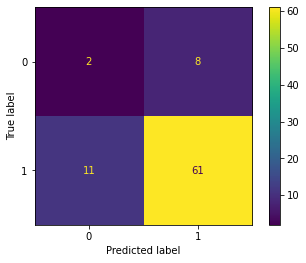

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def conf_matrix(testing_classes, predicted_classes):
    cm =  confusion_matrix(testing_classes, predicted_classes)
    print("TP:", cm[1][1])
    print("TN:", cm[0][0])
    print("FP:", cm[0][1])
    print("FN:", cm[1][0])

    ConfusionMatrixDisplay(cm).plot()